In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()

train_img = train_img/255.0
test_img = test_img/255.0

class_names = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

layer = models.Sequential()

layer.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(32,32,3)))
layer.add(layers.MaxPooling2D((2,2)))
layer.add(layers.Conv2D(64,(3,3), activation = 'relu'))
layer.add(layers.MaxPooling2D((2,2)))
layer.add(layers.Conv2D(32,(3,3), activation = 'relu'))
layer.add(layers.MaxPooling2D((2,2)))

layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [2]:
layer.add(layers.Flatten())
layer.add(layers.Dense(64, activation='relu'))
layer.add(layers.Dense(10))

layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [4]:
layer.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = layer.fit(train_img, train_lab, epochs=10, validation_data=(test_img, test_lab))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7679 - accuracy: 0.7301 - val_loss: 0.9383 - val_accuracy: 0.6735
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7446 - accuracy: 0.7372 - val_loss: 0.8959 - val_accuracy: 0.6961
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7293 - accuracy: 0.7442 - val_loss: 0.8875 - val_accuracy: 0.6986
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7032 - accuracy: 0.7531 - val_loss: 0.8885 - val_accuracy: 0.7052
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6873 - accuracy: 0.7566 - val_loss: 0.8755 - val_accuracy: 0.7046
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6748 - accuracy: 0.7640 - val_loss: 0.8800 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6560 - accuracy: 0.7693 - val_loss: 0.8995 -

313/313 - 3s - loss: 0.9433 - accuracy: 0.6921 - 3s/epoch - 10ms/step
0.6920999884605408


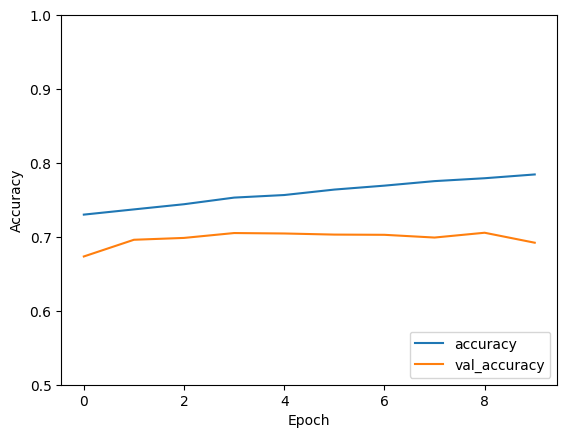

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = layer.evaluate(test_img, test_lab, verbose=2)

print(test_acc)